# PREDICT THE NEXT N NUMBER OF WORDS WITH LSTM

## Preprocess of the text

Here I'll build a modal that can predit the next n number of words of a sentence made of 25 words(since the average of number of words od a sentence is 25). 

My data is the first 4 chapters of the book Moby Dick.

First I'll convert the chapters in doc objects then clean the necessary tokens like punctuations.

Then I 'll combine the tokens and produce sentences with 26 words. The first 25 will be the feature the 26th will be the label.

In [4]:
import spacy
nlp=spacy.load('en_core_web_lg')


In [5]:
with open('moby_dick_four_chapters.txt') as f:
    fulltext=f.read()
    tokens=nlp(fulltext)

print("fulltext length:", len(fulltext))
print("number of tokens:", len(tokens))

fulltext length: 61614
number of tokens: 14480


In [6]:
import numpy as np
sents=[]
for s in tokens.sents:
    sents.append(s)

avg_word_num_in_sent = np.array([len(s.text.split()) for s in sents]).mean()
maxi=np.array([len(s.text.split()) for s in sents]).max()
mini=np.array([len(s.text.split()) for s in sents]).min()
print("avg:",avg_word_num_in_sent,"max:",maxi,"min:",mini)


avg: 24.876126126126128 max: 124 min: 1


In [7]:
tokens[:50]

Call me Ishmael.  Some years ago--never mind how long
precisely--having little or no money in my purse, and nothing
particular to interest me on shore, I thought I would sail about a
little and see the watery part of

### Clean unecessary tokens

In [8]:
def remove_punc(tokens):
    punc = '\n\n \n\n\n!"#$%&()--*+,-./:;<=>?@[\\]^_`{|}~-\t\n '
    return [t.text.lower() for t in tokens if t.text not in punc]

In [9]:
clean_tokens=remove_punc(tokens)
len(clean_tokens)

11338

In [10]:
clean_tokens

['call',
 'me',
 'ishmael',
 'some',
 'years',
 'ago',
 'never',
 'mind',
 'how',
 'long',
 'precisely',
 'having',
 'little',
 'or',
 'no',
 'money',
 'in',
 'my',
 'purse',
 'and',
 'nothing',
 'particular',
 'to',
 'interest',
 'me',
 'on',
 'shore',
 'i',
 'thought',
 'i',
 'would',
 'sail',
 'about',
 'a',
 'little',
 'and',
 'see',
 'the',
 'watery',
 'part',
 'of',
 'the',
 'world',
 'it',
 'is',
 'a',
 'way',
 'i',
 'have',
 'of',
 'driving',
 'off',
 'the',
 'spleen',
 'and',
 'regulating',
 'the',
 'circulation',
 'whenever',
 'i',
 'find',
 'myself',
 'growing',
 'grim',
 'about',
 'the',
 'mouth',
 'whenever',
 'it',
 'is',
 'a',
 'damp',
 'drizzly',
 'november',
 'in',
 'my',
 'soul',
 'whenever',
 'i',
 'find',
 'myself',
 'involuntarily',
 'pausing',
 'before',
 'coffin',
 'warehouses',
 'and',
 'bringing',
 'up',
 'the',
 'rear',
 'of',
 'every',
 'funeral',
 'i',
 'meet',
 'and',
 'especially',
 'whenever',
 'my',
 'hypos',
 'get',
 'such',
 'an',
 'upper',
 'hand',
 '

### Create sentences made of 26 words(First 25 are the freatures, 26th is the label)

In [11]:
l= 'There now is your insular city of the Manhattoes, belted round by'.split()
l[0:3]
l[1:4]

['now', 'is', 'your']

In [12]:
l

['There',
 'now',
 'is',
 'your',
 'insular',
 'city',
 'of',
 'the',
 'Manhattoes,',
 'belted',
 'round',
 'by']

In [13]:
sentences=[]
sentence_len=25+1
for i in range(len(clean_tokens)-sentence_len):
    sentences.append(clean_tokens[i:i+sentence_len])

In [14]:
print(len(sentences[0]))
print(' '.join(sentences[0]))

26
call me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on


In [15]:
print(len(sentences[1]))
print(' '.join(sentences[1]))

26
me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on shore


In [16]:
print(len(sentences[-1]))
print(' '.join(sentences[-1]))

26
soon achieved and he proudly marched out of the room wrapped up in his great pilot monkey jacket and sporting his harpoon like a marshal 's


## Creating the model

### Convert the sentences into  vectors so the model can understand them.

In [17]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()

In [18]:
tokenizer.fit_on_texts(sentences)
tokenizer.word_index

{'the': 1,
 'a': 2,
 'and': 3,
 'of': 4,
 'i': 5,
 'to': 6,
 'in': 7,
 'it': 8,
 'that': 9,
 'he': 10,
 'his': 11,
 'was': 12,
 'but': 13,
 'me': 14,
 'with': 15,
 'as': 16,
 'at': 17,
 'this': 18,
 'you': 19,
 'is': 20,
 'all': 21,
 'for': 22,
 'my': 23,
 'on': 24,
 'be': 25,
 "'s": 26,
 'not': 27,
 'from': 28,
 'there': 29,
 'one': 30,
 'up': 31,
 'what': 32,
 'him': 33,
 'so': 34,
 'bed': 35,
 'now': 36,
 'about': 37,
 'no': 38,
 'into': 39,
 'by': 40,
 'were': 41,
 'out': 42,
 'or': 43,
 'harpooneer': 44,
 'had': 45,
 'then': 46,
 'have': 47,
 'an': 48,
 'upon': 49,
 'little': 50,
 'some': 51,
 'old': 52,
 'like': 53,
 'if': 54,
 'they': 55,
 'would': 56,
 'do': 57,
 'over': 58,
 'landlord': 59,
 'thought': 60,
 'room': 61,
 'when': 62,
 'could': 63,
 "n't": 64,
 'night': 65,
 'here': 66,
 'head': 67,
 'such': 68,
 'which': 69,
 'man': 70,
 'did': 71,
 'sea': 72,
 'time': 73,
 'other': 74,
 'very': 75,
 'go': 76,
 'these': 77,
 'more': 78,
 'though': 79,
 'first': 80,
 'sort': 81,


In [19]:
tokenizer.word_counts

OrderedDict([('call', 27),
             ('me', 2471),
             ('ishmael', 133),
             ('some', 758),
             ('years', 135),
             ('ago', 84),
             ('never', 449),
             ('mind', 164),
             ('how', 321),
             ('long', 374),
             ('precisely', 37),
             ('having', 142),
             ('little', 767),
             ('or', 950),
             ('no', 1003),
             ('money', 120),
             ('in', 5647),
             ('my', 1786),
             ('purse', 71),
             ('and', 9646),
             ('nothing', 281),
             ('particular', 152),
             ('to', 6497),
             ('interest', 24),
             ('on', 1716),
             ('shore', 26),
             ('i', 7150),
             ('thought', 676),
             ('would', 702),
             ('sail', 104),
             ('about', 1014),
             ('a', 10377),
             ('see', 416),
             ('the', 15540),
             ('watery', 26),
  

In [20]:
sequences = tokenizer.texts_to_sequences(sentences)

In [21]:
# to see the shape of sequences
import numpy as np
np.array(sequences).shape

(11312, 26)

In [22]:
print(sentences[0])
print(sequences[0])
print('\n')
print(sentences[1])
print(sequences[1])

['call', 'me', 'ishmael', 'some', 'years', 'ago', 'never', 'mind', 'how', 'long', 'precisely', 'having', 'little', 'or', 'no', 'money', 'in', 'my', 'purse', 'and', 'nothing', 'particular', 'to', 'interest', 'me', 'on']
[956, 14, 263, 51, 261, 408, 87, 219, 129, 111, 954, 260, 50, 43, 38, 314, 7, 23, 546, 3, 150, 259, 6, 2713, 14, 24]


['me', 'ishmael', 'some', 'years', 'ago', 'never', 'mind', 'how', 'long', 'precisely', 'having', 'little', 'or', 'no', 'money', 'in', 'my', 'purse', 'and', 'nothing', 'particular', 'to', 'interest', 'me', 'on', 'shore']
[14, 263, 51, 261, 408, 87, 219, 129, 111, 954, 260, 50, 43, 38, 314, 7, 23, 546, 3, 150, 259, 6, 2713, 14, 24, 957]


### LSTM model

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding
from keras.utils import to_categorical
from tensorflow.keras.optimizers.legacy import Adam

In [24]:
np.array(sequences)

array([[ 956,   14,  263, ..., 2713,   14,   24],
       [  14,  263,   51, ...,   14,   24,  957],
       [ 263,   51,  261, ...,   24,  957,    5],
       ...,
       [ 952,   12,  166, ...,  262,   53,    2],
       [  12,  166, 2712, ...,   53,    2, 2718],
       [ 166, 2712,    3, ...,    2, 2718,   26]])

In [25]:
vocabsize=len(tokenizer.word_counts)


X =  np.array(sequences)[:,:-1] # features
y = to_categorical(np.array(sequences)[:,-1],num_classes=vocabsize+1)# label
# there is no test set

seq_len=X.shape[1]

In [26]:
X.shape

(11312, 25)

In [27]:
vocabsize

2718

In [37]:
def create_model(vocabsize, seq_len):
    model = Sequential()
    #input layer
    model.add(Embedding(input_dim=vocabsize+1, output_dim=50, input_length=seq_len))
    #hidden layers
    model.add(LSTM(units=250, return_sequences=True)) #units:multiple of seq_len
                                                      #When return_sequences parameter is True, it will output all the hidden states of each time steps. The ouput is a 3D array of real numbers.
    model.add(LSTM(150))
    model.add(Dense(50, activation='relu'))# to manage vanishing gradient

    #output layer
    model.add(Dense(vocabsize+1, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
   
    model.summary()
    
    return model

In [38]:
model=create_model(vocabsize, seq_len)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 50)            135950    
                                                                 
 lstm_2 (LSTM)               (None, 25, 250)           301000    
                                                                 
 lstm_3 (LSTM)               (None, 150)               240600    
                                                                 
 dense_2 (Dense)             (None, 50)                7550      
                                                                 
 dense_3 (Dense)             (None, 2719)              138669    
                                                                 
Total params: 823769 (3.14 MB)
Trainable params: 823769 (3.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
from pickle import dump,load

In [39]:
# fit model
history=model.fit(X, y, batch_size=128, epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
71/71 [==============================] - 23s 235ms/step - loss: 6.9635 - accuracy: 0.0439 - val_loss: 6.6448 - val_accuracy: 0.0446
Epoch 2/100
71/71 [==============================] - 16s 229ms/step - loss: 6.3595 - accuracy: 0.0549 - val_loss: 6.7369 - val_accuracy: 0.0446
Epoch 3/100
71/71 [==============================] - 16s 222ms/step - loss: 6.3271 - accuracy: 0.0549 - val_loss: 6.8181 - val_accuracy: 0.0446
Epoch 4/100
71/71 [==============================] - 17s 243ms/step - loss: 6.3139 - accuracy: 0.0549 - val_loss: 6.8752 - val_accuracy: 0.0446
Epoch 5/100
71/71 [==============================] - 16s 232ms/step - loss: 6.3097 - accuracy: 0.0549 - val_loss: 6.9136 - val_accuracy: 0.0446
Epoch 6/100
71/71 [==============================] - 17s 245ms/step - loss: 6.3063 - accuracy: 0.0549 - val_loss: 6.9437 - val_accuracy: 0.0446
Epoch 7/100
71/71 [==============================] - 17s 235ms/step - loss: 6.3054 - accuracy: 0.0549 - val_loss: 7.0061 - val_accuracy:

In [40]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Loss Curves')

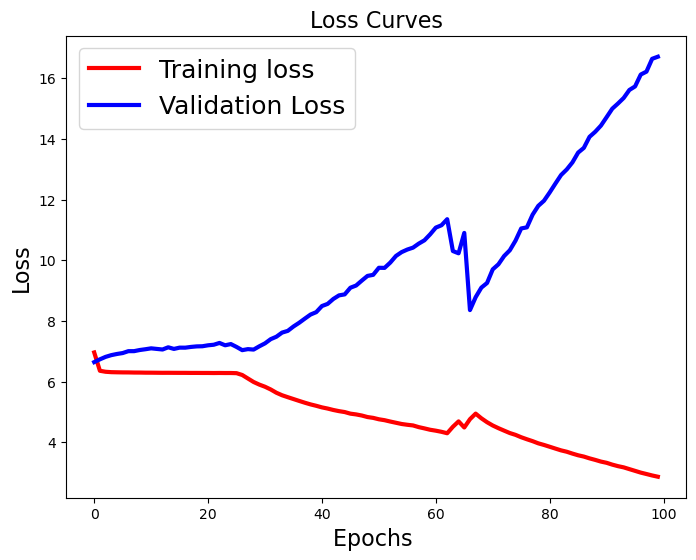

In [41]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

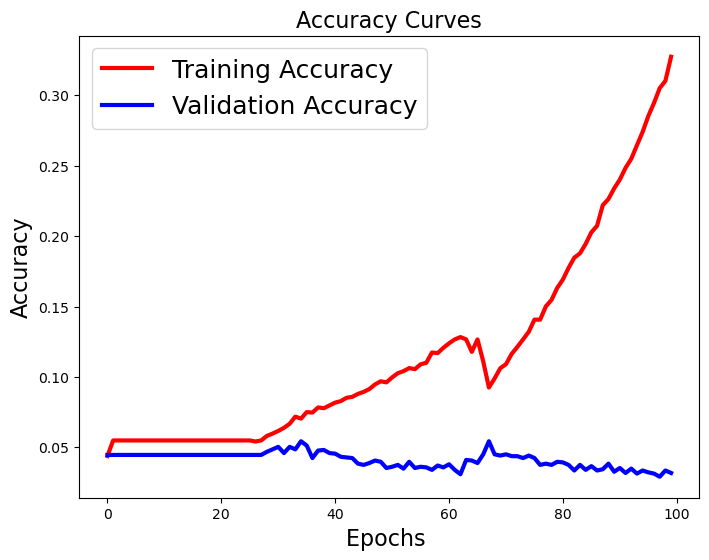

In [42]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [36]:
# save the model to file
model.save('model2.h5')
# save the tokenizer
dump(tokenizer, open('tokenize.pickle', 'wb'))

c:\Users\SERRA\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Generate a new text based of a seed

In [59]:
from random import randint
from pickle import load
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
model = load_model('model1.h5')

In [82]:

# convert seed text to sequence
encoded_text = tokenizer.texts_to_sequences([sentences[0]])[0]

# padding is used to make sure the input length is 25 in each iteration
padded = pad_sequences([encoded_text],maxlen=25,truncating='pre')
#predict next words index in that is defined by the tokenizer
pred=model.predict(padded, verbose=1)[0]
pred_class_index=np.argmax(pred,axis=0)

#find the word the index corresponds
tokenizer.index_word[pred_class_index]

" ".join(sentences[0])+" "+tokenizer.index_word[pred_class_index]


1/1 [==============================] - 0s 30ms/step


'call me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on shore i thought i i go go yes yes an'

In [101]:
def predict_next_n_words(model,tokenizer,seedtext,number_of_words):
    output=[]

    input_text=seedtext

    for n in range(number_of_words):
        # convert seed text to sequence
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]

        # padding is used to make sure the input length is 25 in each iteration
        padded = pad_sequences([encoded_text],maxlen=25,truncating='pre')
        #predict next words index in that is defined by the tokenizer
        pred=model.predict(padded, verbose=0)[0]
        pred_class_index=np.argmax(pred,axis=0)

        #find the word the index corresponds
        word= tokenizer.index_word[pred_class_index]
        
        input_text +=" "+word
        output.append(word)
        
    print(output)
    print(input_text)

    return seedtext+" "+" ".join(output)

In [102]:
seedtext=" ".join(sentences[5])
number_of_words=3
predict_next_n_words(model,tokenizer,seedtext,number_of_words)

['sail', 'about', 'a']
ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on shore i thought i would sail about a


'ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on shore i thought i would sail about a'

In [103]:
" ".join(sentences[5])

'ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on shore i thought i would'